##### [Updated deprecated code last on around 2019 - some of Functionality could be breaking]

#### Trying to Impute missing values in wine Dataset using KNN Imputer such that Wine target class Classification can be accurately done

In [54]:
#### Trying to Impute missing values in wine Dataset using KNN Imputer such that Wine Target Class Classification can be accurately done

#### Imputting missing values using KNNImuter with default number of neighbors and 
#### Evaluating the Model(DecisionTreeClassifier) on train, test/holdout 

In [55]:
# Evaluating  knn imputation and DecisionTreeClassifier for wine dataset from UCI repository

import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [56]:
# Loading the wine dataset
dataframe_wine = pd.read_csv('WinewithMissingValues.csv')
X, y = dataframe_wine.values[:, 1:], dataframe_wine.values[:, 0]
print('shape of X and y :', X.shape, y.shape)

shape of X and y : (178, 13) (178,)


In [57]:
print('Printing percentage of missing values in each column of the dataset:')
print(20*'--')
for i in range(X.shape[1]):
	# counting number of rows with missing values
    n_miss = pd.DataFrame(X).iloc[:,i].isnull().sum()
    perc = n_miss * 100 / X.shape[0]
    col_name = dataframe_wine.columns[i]  
    print('%s - Missing: %d (%.1f%%)' % (col_name, n_miss, perc))

# dropping header column   
X, y = dataframe_wine.values[1:, 1:], dataframe_wine.values[1:, 0]

Printing percentage of missing values in each column of the dataset:
----------------------------------------
class - Missing: 0 (0.0%)
Alcohol - Missing: 40 (22.5%)
Malicacid - Missing: 26 (14.6%)
Ash - Missing: 24 (13.5%)
Alcalinity_of_ash - Missing: 32 (18.0%)
Magnesium - Missing: 62 (34.8%)
Total_phenols - Missing: 128 (71.9%)
Flavanoids - Missing: 69 (38.8%)
Nonflavanoid_phenols - Missing: 97 (54.5%)
Proanthocyanins - Missing: 8 (4.5%)
Color_intensity - Missing: 0 (0.0%)
Hue - Missing: 0 (0.0%)
0D280_0D315_of_diluted_wines - Missing: 0 (0.0%)


In [58]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((141, 13), (36, 13), (141,), (36,))

In [59]:
# Defining model pipeline
imputer = KNNImputer()
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

In [60]:
# Defining model evaluation through cross-validation technique
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=1, random_state=1)
# Evaluating model on training data
scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy, std(Accuracy) on training data: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy, std(Accuracy) on training data: 0.915 (0.056)


In [61]:
# Evaluating model on testing/holdout data
pipeline.fit(X_test, y_test)

Pipeline(steps=[('i', KNNImputer()), ('m', DecisionTreeClassifier())])

In [62]:
# Evaluating model on testing/holdout data
pipeline.score(X_test, y_test)
print('Accuracy on testing data: %.3f ' % (pipeline.score(X_test, y_test)))

Accuracy on testing data: 1.000 


#### Imputting missing values using KNNImuter with different number of neighbors and 
#### Evaluating the Model(DecisionTreeClassifier) for each case on train, test/holdout 

In [63]:
# Imputting missing values using KNNImuter with different number of neighbors and evaluating the model for each case on train, test/holdout 

# Loading the wine dataset
dataframe_wine = pd.read_csv('WinewithMissingValues.csv')
X, y = dataframe_wine.values[1:, 1:], dataframe_wine.values[1:, 0]
print('shape of X and y :', X.shape, y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

shape of X and y : (177, 13) (177,)


On training data - k, mean(accuracy), std(accuracy) :
Neighbor 1 0.870 (0.023)
Neighbor 3 0.894 (0.041)
Neighbor 5 0.890 (0.031)


Neighbor 7 0.907 (0.033)
Neighbor 9 0.898 (0.030)
Neighbor 11 0.882 (0.052)
Neighbor 12 0.862 (0.057)


C:\Users\darsh\AppData\Local\Temp\ipykernel_24960\2292083599.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=knnNeighbors, showmeans=True)


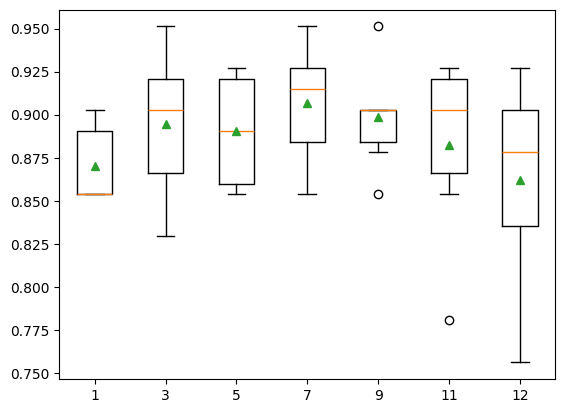

In [ ]:
# Evaluating each case/strategy on the dataset on training data
results = list()
knnNeighbors = [str(i) for i in [1,3,5,7,9,11,12]]
print('On training data - k, mean(accuracy), std(accuracy) :')
for s in knnNeighbors:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', DecisionTreeClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
	scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('Neighbor %s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plotting model performance for comparison for each case of Neighbors
pyplot.boxplot(results, labels=knnNeighbors, showmeans=True)
pyplot.show()
# Yellow lines are median, Green Trianlgles are mean in boxplot

In [65]:
# Evaluating each case/strategy on Tesing data
results = list()
knnNeighbors = [str(i) for i in [1,3,5,7,9,11,12]]
print('On testing data - k, accuracy :')
for s in knnNeighbors:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', DecisionTreeClassifier())])
	pipeline.fit(X_test, y_test)
	scores = pipeline.score(X_test, y_test)
	results.append(scores)
	print('Neighbor %s %.3f ' % (s, scores))

On testing data - k, accuracy :
Neighbor 1 1.000 
Neighbor 3 1.000 
Neighbor 5 1.000 
Neighbor 7 1.000 
Neighbor 9 1.000 
Neighbor 11 1.000 
Neighbor 12 1.000 
